Template Matching Mendeteksi Adolf Hitler Pada Gambar

In [8]:
# tampilkan kedua gambar
import cv2
import numpy as np
import matplotlib.pyplot as plt

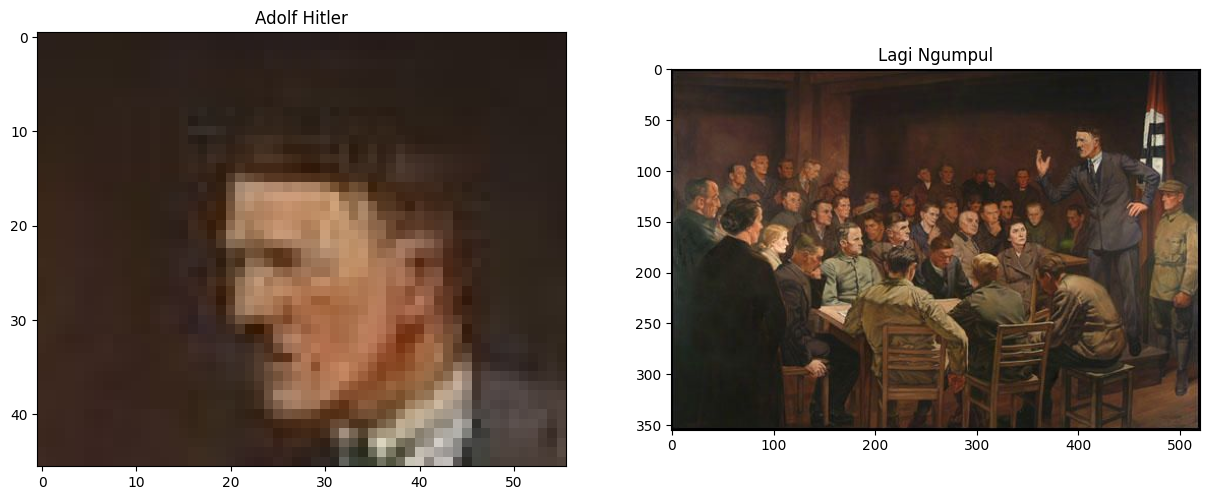

In [13]:
# Baca gambar dan konversi warna ke RGB
einstein = cv2.imread('Adolf Hitler.jpg')
einstein = cv2.cvtColor(einstein, cv2.COLOR_BGR2RGB)

# Baca gambar dan konversi warna ke RGB
solvay = cv2.imread('Adolf Hitler Sedang Rapat.jpg')
solvay = cv2.cvtColor(solvay, cv2.COLOR_BGR2RGB)

# Tampilkan gambar menggunakan Matplotlib
plt.subplot(121), plt.imshow(einstein), plt.title('Adolf Hitler')
plt.subplot(122), plt.imshow(solvay), plt.title('Lagi Ngumpul')
plt.show()

hasil metode 4 : 


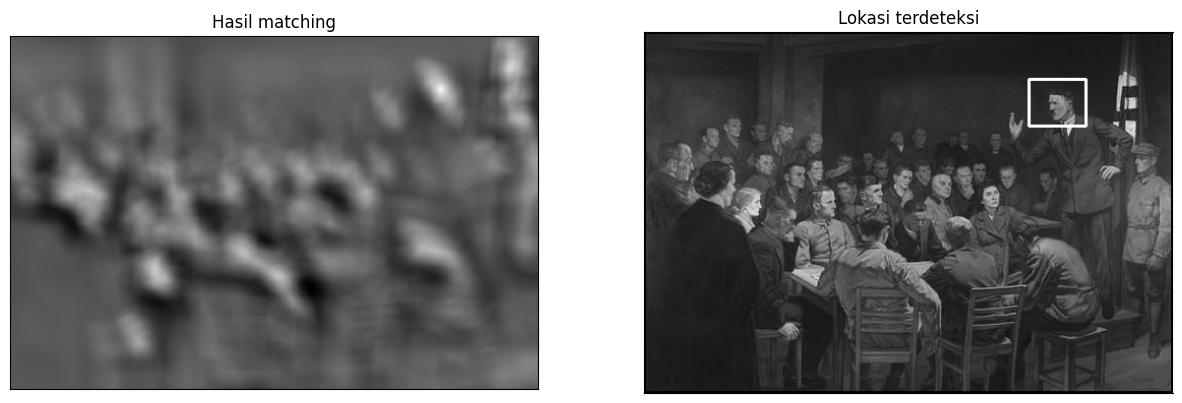

hasil metode 5 : 


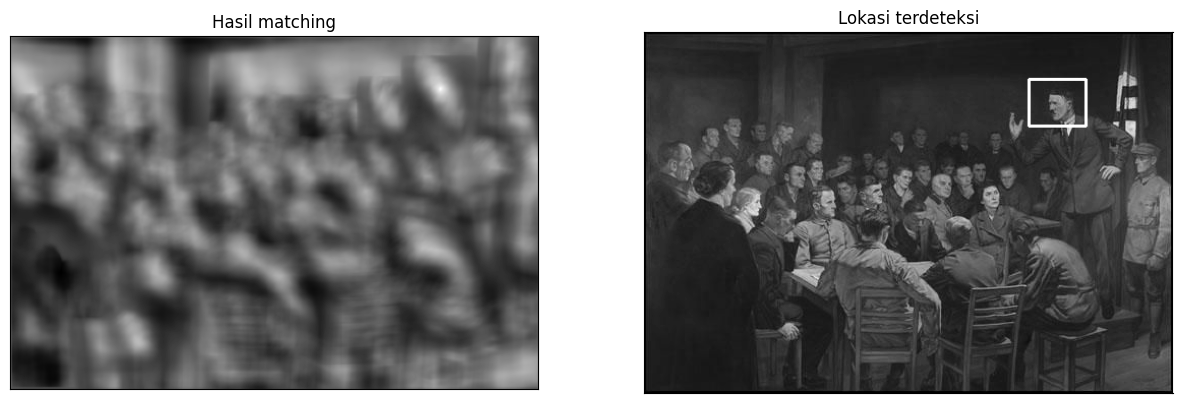

hasil metode 2 : 


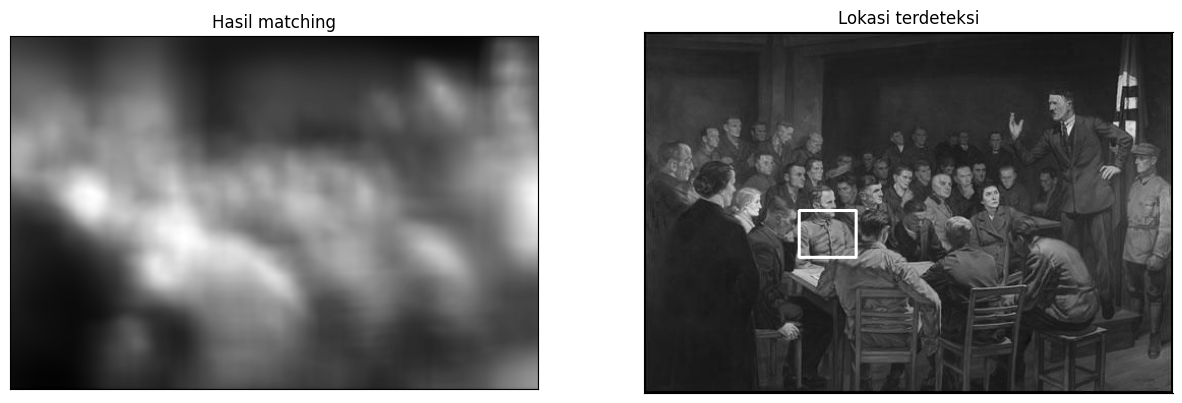

hasil metode 3 : 


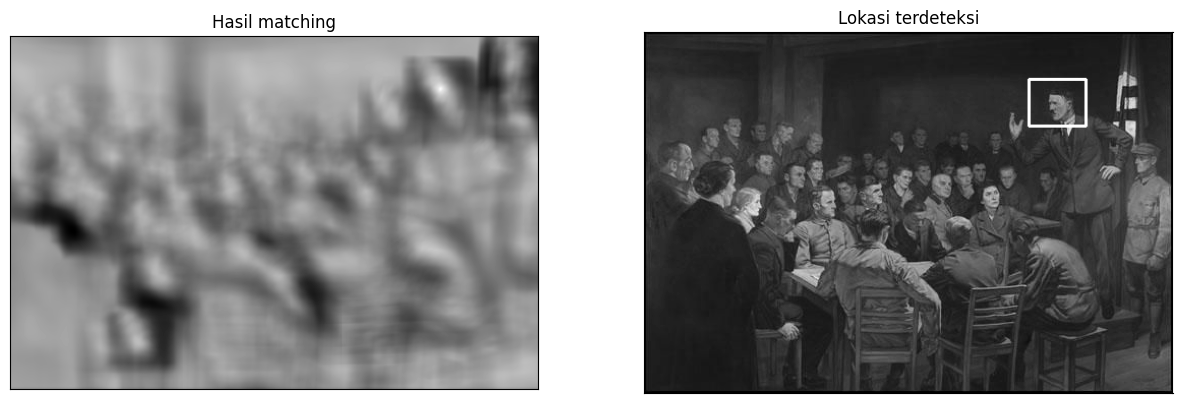

hasil metode 0 : 


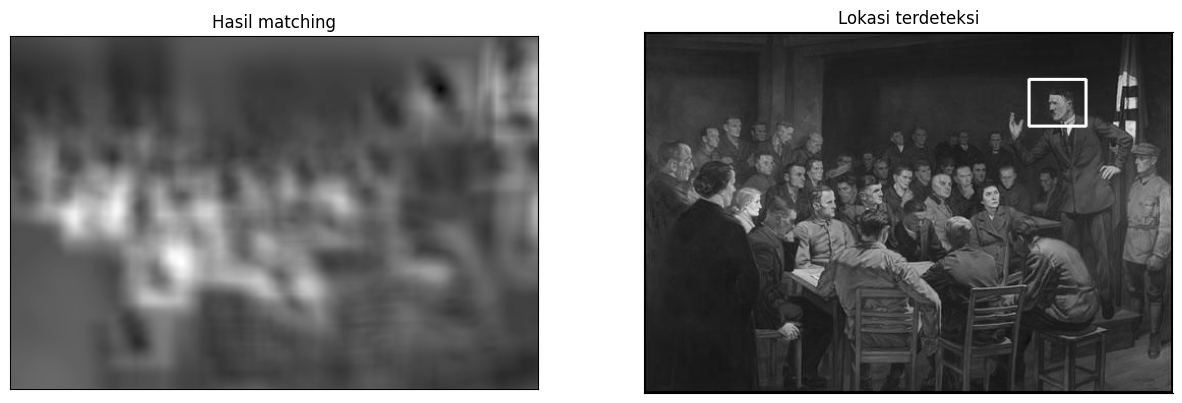

hasil metode 1 : 


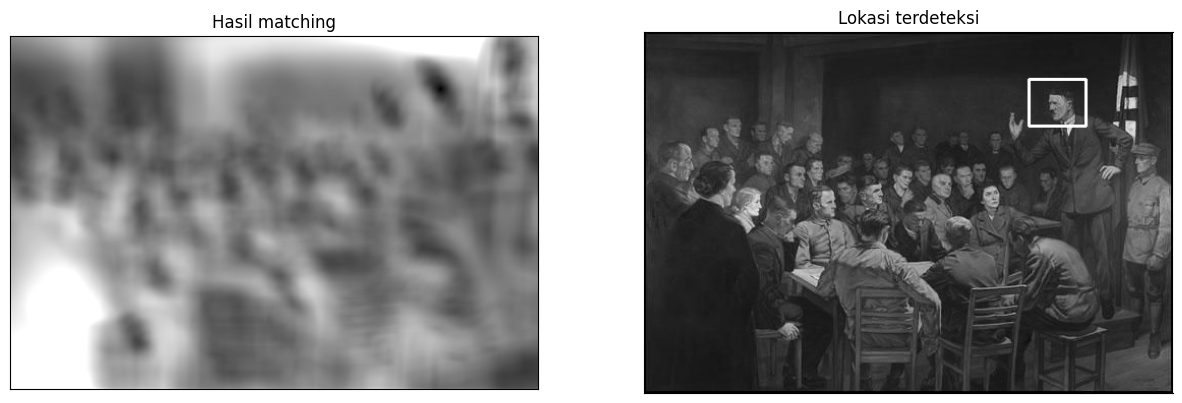

In [12]:
img = cv2.imread('Adolf Hitler Sedang Rapat.jpg', 0)
img2 = img.copy()
template = cv2.imread('Adolf Hitler.jpg', 0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
           cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (15, 15)

for method in methods:
    img = img2.copy()
    
    # menggunakan template matching
    res = cv2.matchTemplate(img, template, method)

    # mencari ukuran citra template untuk menggambar kotak
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # metode TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan persamaan yang sedikit berbeda
    # sehingga dibuatkan fungsi khusus untuk mengambil nilai minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # buat persegi pada lokasi yang ditemukan
    cv2.rectangle(img, top_left, bottom_right, 255, 2)  # 2 adalah ketebalan garis kotak

    print("hasil metode", method, ": ")
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Hasil matching'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Lokasi terdeteksi'), plt.xticks([]), plt.yticks([])
    plt.show()